In [10]:
import sqlite3
import pandas as pd

# Connect to the DB file used by DBeaver (replace path)
conn = sqlite3.connect("../nfl_data.db")


In [12]:
df = pd.read_sql("SELECT * FROM team_stats", conn)
df.head()


,recent_team,result,season,season_type,week,touchdown_points,touchdowns_scored,passing_yards,rushing_yards,receiving_yards,...,sack_yards,sack_fumbles,sack_fumbles_lost,passing_air_yards,passing_yards_after_catch,passing_first_downs,rushing_fumbles_lost,receiving_fumbles_lost,receiving_air_yards,receiving_yards_after_catch
0,ARI,loss,2018,REG,1,6.0,1.0,153.0,68.0,153.0,...,8.0,1,1,208.0,66.0,6.0,0.0,0.0,208.0,66.0
1,ARI,loss,2018,REG,3,12.0,2.0,193.0,53.0,193.0,...,25.0,2,1,248.0,76.0,8.0,0.0,0.0,238.0,76.0
2,ARI,loss,2018,REG,4,12.0,2.0,180.0,92.0,180.0,...,9.0,0,0,245.0,77.0,9.0,1.0,0.0,230.0,77.0
3,ARI,loss,2018,REG,7,6.0,1.0,194.0,69.0,194.0,...,40.0,3,2,290.0,72.0,8.0,0.0,0.0,292.0,72.0
4,ARI,win,2018,REG,8,12.0,2.0,252.0,88.0,252.0,...,19.0,0,0,288.0,119.0,15.0,0.0,1.0,283.0,119.0


In [13]:
df['yards_per_carry'] = df['rushing_yards'] / df['carries']
df['rush_td_efficiency'] = df['rushing_tds'] / df['carries']


In [15]:
# By outcome
df.groupby('result')[['carries', 'rushing_yards', 'rushing_tds', 'yards_per_carry', 'rush_td_efficiency']].describe()


carries                                                     \
         count       mean       std   min   25%   50%   75%   max   
result                                                              
loss    1953.0  22.771633  6.269566   5.0  18.0  22.0  27.0  52.0   
win     1931.0  30.615225  6.855243  11.0  26.0  31.0  35.0  54.0   

       rushing_yards              ... yards_per_carry             \
               count        mean  ...             75%        max   
result                            ...                              
loss          1953.0   98.576037  ...        4.962963  10.777778   
win           1931.0  134.659762  ...        5.090909  10.555556   

       rush_td_efficiency                                                    \
                    count      mean       std  min  25%       50%       75%   
result                                                                        
loss               1953.0  0.026775  0.032591  0.0  0.0  0.000000  0.047619   
win                1931.0  0.039286  0.032859  0.0  0.0  0.035714  0.060606   

                  
             max  
result            
loss    0.181818  
win     0.194444  

[2 rows x 40 columns]

In [16]:
df[['carries', 'rushing_yards', 'rushing_tds', 'yards_per_carry', 'rush_td_efficiency']].corr()


,carries,rushing_yards,rushing_tds,yards_per_carry,rush_td_efficiency
carries,1.000000,0.768872,0.421504,0.201396,0.159700
rushing_yards,0.768872,1.000000,0.455342,0.752220,0.246942
rushing_tds,0.421504,0.455342,1.000000,0.259649,0.923245
yards_per_carry,0.201396,0.752220,0.259649,1.000000,0.207988
rush_td_efficiency,0.159700,0.246942,0.923245,0.207988,1.000000


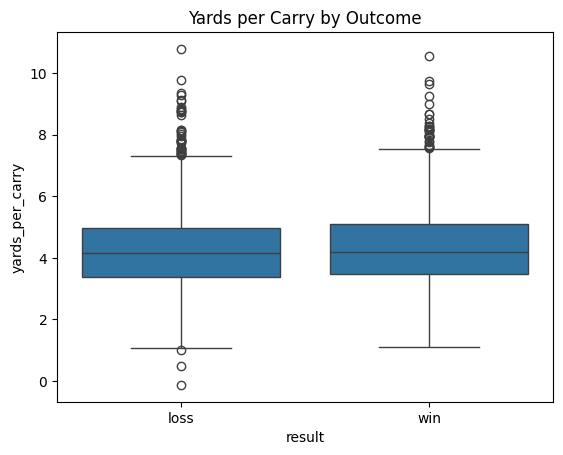

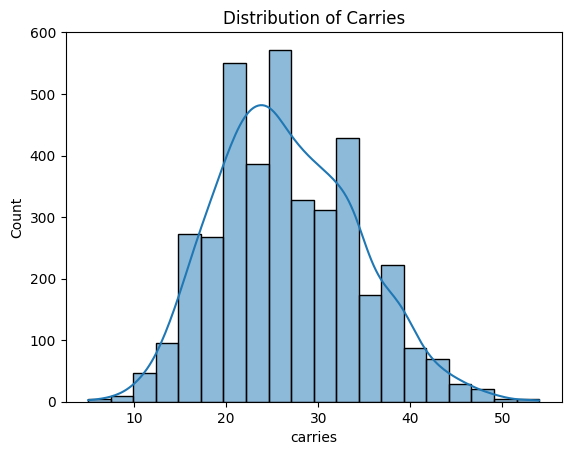

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='result', y='yards_per_carry')
plt.title("Yards per Carry by Outcome")
plt.show()

sns.histplot(df['carries'], bins=20, kde=True)
plt.title("Distribution of Carries")
plt.show()


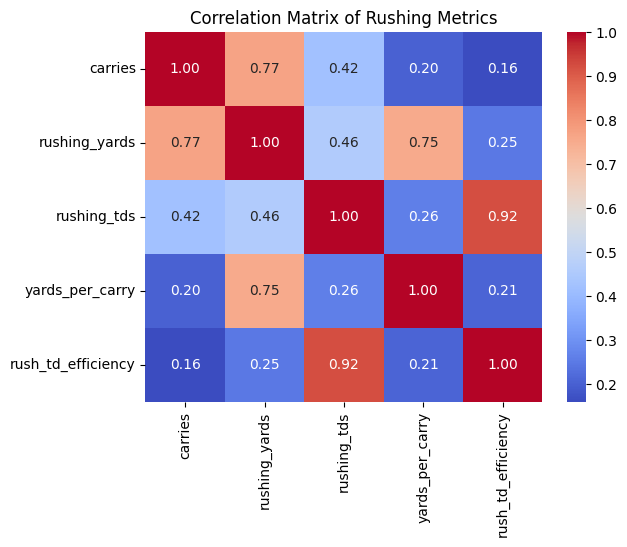

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['carries', 'rushing_yards', 'rushing_tds', 'yards_per_carry', 'rush_td_efficiency']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Rushing Metrics")
plt.show()
